# Tugas Akhir Analitik dan Visualisasi Data kelas C

Dataset diambil dari [BPS, Statistik Kriminalitas 2014](https://www.bappenas.go.id/files/data/Politik_Hukum_Pertahanan_dan_Keamanan/Statistik%20Kriminal%202014.pdf)


### Persiapan

In [8]:
import pandas as pd #
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

raw_data = pd.read_csv('https://raw.githubusercontent.com/bimaatp/AVD/main/Kriminalitas_Indonesia_2011_2013.csv')
print(raw_data.shape)
raw_data.head()

(31, 4)


,Kepolisian Daerah,Crime Total,Crime Cleared,Clearance Rate
0,A c e h,27.464,10.998,40
1,Sumatera Utara,111.569,50.160,45
2,Sumatera Barat,39.487,19.137,48
3,Riau,30.255,12.767,42
4,Jambi,14.586,7.829,54


In [9]:
raw_data.describe(include='all')

,Kepolisian Daerah,Crime Total,Crime Cleared,Clearance Rate
count,31,31.000000,31.000000,31.000000
unique,31,NaN,NaN,NaN
top,Papua,NaN,NaN,NaN
freq,1,NaN,NaN,NaN
mean,NaN,33.253161,17.619129,51.645161
std,NaN,31.682536,19.243897,20.140421
min,NaN,2.990000,1.535000,18.000000
25%,NaN,15.323500,7.210500,39.500000
50%,NaN,27.464000,11.113000,48.000000
75%,NaN,32.675000,20.382500,62.000000


### Data Preprocessing

In [11]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31 entries, 0 to 30
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Kepolisian Daerah  31 non-null     object 
 1   Crime Total        31 non-null     float64
 2   Crime Cleared      31 non-null     float64
 3   Clearance Rate     31 non-null     int64  
dtypes: float64(2), int64(1), object(1)
memory usage: 1.1+ KB


In [12]:
raw_data.isnull().sum()

Kepolisian Daerah    0
Crime Total          0
Crime Cleared        0
Clearance Rate       0
dtype: int64

In [15]:
data_preprocessed = data_no_missing_value.copy()

### EDA

In [17]:
data_preprocessed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31 entries, 0 to 30
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Kepolisian Daerah  31 non-null     object 
 1   Crime Total        31 non-null     float64
 2   Crime Cleared      31 non-null     float64
 3   Clearance Rate     31 non-null     int64  
dtypes: float64(2), int64(1), object(1)
memory usage: 1.1+ KB


In [19]:
data_preprocessed.describe()

,Crime Total,Crime Cleared,Clearance Rate
count,31.000000,31.000000,31.000000
mean,33.253161,17.619129,51.645161
std,31.682536,19.243897,20.140421
min,2.990000,1.535000,18.000000
25%,15.323500,7.210500,39.500000
50%,27.464000,11.113000,48.000000
75%,32.675000,20.382500,62.000000
max,155.464000,98.440000,114.000000


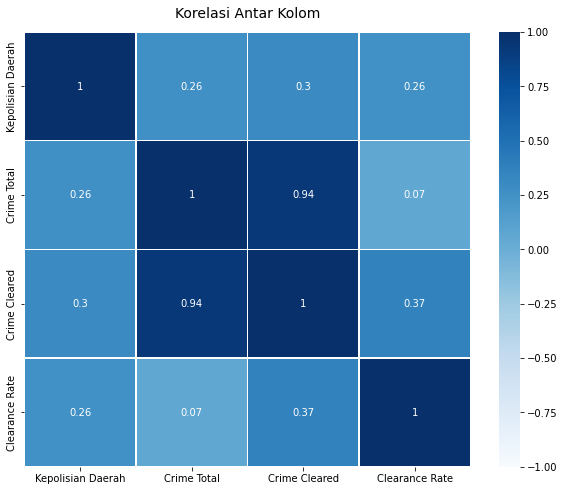

In [20]:
object_columns = data_preprocessed.select_dtypes(['object', 'category'])

labeled_data = data_preprocessed.copy()
for column in object_columns:
  labeled_data[column] = labeled_data[column].astype('category')
  labeled_data[column] = labeled_data[column].cat.codes

plt.figure(figsize=(10,8), facecolor='white')
sns.heatmap(labeled_data.corr(), annot=True, vmin=-1, vmax=1, cmap='Blues', linecolor='white', linewidths=.5) 
plt.title('Korelasi antar kolom'.title(), size=14, pad=14)
plt.show()